# Week 10 Tutorial Part 3 Solved

This part covers:

* Test of CAPM as in BKM chapter 13 section 1 performed on test portfolios.

The comment sign in Stata is * not #

In [1]:
* again import the data we prepared in python
import delimited data_stata.csv, varnames(1) clear
* save it as a stata file to open again later
save all_data, replace


(102 vars, 1,131 obs)

file all_data.dta saved


In [2]:
%browse

,date,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
1,192607,2.96,.,12.1456,.,-20.8549,-6.7063999,-4.9629002,-5.1012001,15.5076,-1.8598,-2.6670001,5.9933,-6.368,-22.1712,9.2639999,.,-.77399999,.55119997,-3.5109,-3.4802999,14.373,-.22,3.0499001,4.2083998,-.3484,-1.1113,.,-2.0486,-4.7865,-4.8302999,-.51999998,-.55580002,4.0507998,4.3660002,.,-.50910002,3.0641999,-1.0948,-1.5581,-.72259998,4.9979,6.9995999,-5.0272002,.9601,2.3057001,-5.6490998,8.6922998,.7022,-.149,.69069999,-4.1627002,2.2667999,3.9479001,1.2187001,8.5976,2.2964001,-3.0415001,-.0339,10.622,-.9569,-2.7904999,1.2444,-.37670001,-.67970002,.53799999,3.9124,4.8652,.73159999,-1.21,3.4205,6.4467001,2.4905,1.3961999,.68540001,2.9637001,-.5553,-.23469999,-.92269999,1.6057,5.9584999,-7.2907,9.0911999,1.2638,2.3527999,1.5140001,.75940001,1.3447,5.5893998,1.0532,.037799999,.,3.1210999,.96200001,18.796101,1.2027,1.7259001,2.2634001,2.9444001,.1178,.6376,.
2,192608,2.6400001,.,2.7404001,.,7.75,6.4994998,-3.8139,-4.3688002,-1.9029,-5.6324,9.3514996,-4.1314001,.69019997,-2.0357001,-12.0206,.,3.4384999,-2.0771999,4.5306001,4.6768999,16.631001,8.8409004,-4.8948998,-3.1099999,-3.3110001,5.2764001,.,-2.2342,.37040001,5.9885001,-1.4511,1.9495,5.9685001,1.2956001,.,.73280001,7.8888998,-4.1128998,4.4559999,17.0464,7.0963001,-.25,-.94889998,.34200001,2.4184,4.1118999,1.9681,3.9154,3.8634,6.5184002,-8.4589996,-1.0072,-2.1923001,5.1417999,-.47440001,4.5537,-.1323,4.3723001,4.4561,16.2542,4.4358001,1.4906,.5794,5.4222999,1.184,2.4147,-1.8368,-4.3196998,5.3720999,7.0430999,6.9375,.3493,1.5917,3.8447001,3.1043,.63709998,4.2005,1.6305,6.9864998,9.6638002,-6.7716999,-.54640001,-2.4157,2.2483001,.0414,2.8965001,-.1014,3.0538001,2.7435999,3.911,.,-.0121,3.7128,8.3175001,2.7599001,.89270002,2.7763,5.8435998,5.8105998,10.9745,.
3,192609,.36000001,.,-18.813,.,-3.9337001,-5.2811999,-2.4038999,-4.8014002,-10.84,.26190001,7.5148001,-3.4588001,-10.1692,-18.4118,4.9310002,.,-7.6511002,-.92900002,1.1269,-2.8060999,-.3502,-.23,-7.9601002,-1.2452,1.1059999,-.021500001,.,2.5434999,-1.1426001,-7.9573002,-1.6663001,2.9361,-3.174,-4.3066001,.,.4655,2.2848001,-4.1662998,-4.5125999,13.6154,1.0762,-2.8332,-5.0592999,-1.4854,.9497,-1.7338001,-.2861,-.18780001,7.8720002,-9.3232002,-1.043,2.0309999,-.1943,.0165,1.6112,-1.9852,-3.7037001,4.0749002,-1.2369,-.222,-3.9988999,-3.9926,-8.8912001,-2.8556001,2.7328999,-3.5827999,-1.3142999,2.2404001,2.4703,-3.1563001,-3.1454999,7.1609998,1.9656,-1.8188,.1485,-1.3561,-2.1835999,1.654,-1.0849,5.2602,9.8474998,-.96899998,-4.5281,.024,-.0208,-.0136,1.252,-2.5525,-.1302,-4.1629,.,-.62199998,-2.2135999,10.5549,.57730001,-1.1485,.85890001,-.77359998,-1.1824,-1.3003,.
4,192610,-3.24,.,-4.4569001,.,-11.8585,-5.7196002,-18.097799,3.2354,-9.5432997,-9.4792995,-2.0660999,-12.5857,1.3326,-.88819999,-4.1199999,.,-2.566,.13240001,14.6097,-6.2660999,2.0276,-8.6533003,-7.4446998,4.7683001,-2.5132999,.99070001,.,-6.1424999,-13.8763,-2.095,-6.2911,-.6911,.76389998,-8.0005999,.,-3.3439,-14.2953,-10.3553,-6.0511999,15.3381,-5.8021998,-2.0352001,-5.9802999,-4.0542998,-4.2041998,-2.6852,-2.0938001,-3.4812,-3.7639999,-5.2426,33.286598,-4.3119998,-8.7824001,-1.7738,.91729999,1.9784,1.0470001,-3.0157001,.1665,-7.7546,-3.4071,-.50059998,-2.8885,-3.4121001,-.43399999,-2.9837999,-1.4527,-3.9347,-4.6195002,-10.0029,-9.9295998,-6.14

# Task 1: Multiple time-series regressions in a loop

Loop over all portfolios, regress each of them on the MRP and save three outputs from each regression: alpha, beta and the root MSE.

In [3]:
* save all variable names of the portfolios without ex_mkt in a local macro named ports using the command unab
unab ports: smalllobm - bighibm
* check to see if the var names of the 100 test portfolios are saved in the local macro ports
di "`ports'"



smalllobm me1bm2 me1bm3 me1bm4 me1bm5 me1bm6 me1bm7 me1bm8 me1bm9 smallhibm me2b
> m1 me2bm2 me2bm3 me2bm4 me2bm5 me2bm6 me2bm7 me2bm8 me2bm9 me2bm10 me3bm1 me3b
> m2 me3bm3 me3bm4 me3bm5 me3bm6 me3bm7 me3bm8 me3bm9 me3bm10 me4bm1 me4bm2 me4b
> m3 me4bm4 me4bm5 me4bm6 me4bm7 me4bm8 me4bm9 me4bm10 me5bm1 me5bm2 me5bm3 me5b
> m4 me5bm5 me5bm6 me5bm7 me5bm8 me5bm9 me5bm10 me6bm1 me6bm2 me6bm3 me6bm4 me6b
> m5 me6bm6 me6bm7 me6bm8 me6bm9 me6bm10 me7bm1 me7bm2 me7bm3 me7bm4 me7bm5 me7b
> m6 me7bm7 me7bm8 me7bm9 me7bm10 me8bm1 me8bm2 me8bm3 me8bm4 me8bm5 me8bm6 me8b
> m7 me8bm8 me8bm9 me8bm10 me9bm1 me9bm2 me9bm3 me9bm4 me9bm5 me9bm6 me9bm7 me9b
> m8 me9bm9 me9bm10 biglobm me10bm2 me10bm3 me10bm4 me10bm5 me10bm6 me10bm7 me10
> bm8 me10bm9 bighibm


In [4]:
* add 3 more empty observations
local new_obs = _N + 3
set obs `new_obs'



number of observations (_N) was 1,131, now 1,134


In [5]:
* set up the loop
foreach v of local ports {
    qui reg `v' ex_mkt
    qui replace `v' = _b[_cons] in -3
    qui replace `v' = _b[ex_mkt] in -2
    qui replace `v' = e(rmse) in -1
}

In [6]:
%tail

,date,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
1125,202003,-13.38,-21.310499,-5.1875,-17.238001,-20.1154,-17.6978,-19.593,-23.7342,-25.6621,-23.537701,-29.3673,-19.534,-30.384701,-10.5909,-16.9624,-23.5564,-23.6786,-24.865101,-30.771799,-29.128201,-28.405701,-21.879499,-20.2033,-17.805,-21.298201,-21.005899,-27.0264,-23.801001,-23.3372,-34.069,-40.2654,-18.7288,-20.0089,-21.022699,-18.849501,-23.3964,-17.111601,-17.7111,-29.143101,-25.8762,-42.219299,-20.254801,-18.0221,-16.84,-24.640499,-23.2108,-12.9382,-24.5977,-25.364,-32.824902,-20.8745,-16.757999,-17.391899,-8.3483,-24.283701,-19.428699,-16.0935,-28.648001,-29.088499,-34.435299,-21.82,-16.6077,-14.2722,-20.059601,-21.011499,-23.003799,-25.7258,-29.850901,-32.635101,-29.027,-34.430599,-8.5895004,-12.6845,-19.452801,-15.7017,-17.930599,-21.930401,-31.2649,-32.691299,-33.660599,-35.147701,-12.4745,-11.4048,-17.8276,-17.794201,-12.2128,-19.007299,-22.3818,-24.6322,-20.465099,-47.561901,-7.7200999,-6.7196002,-9.3329,-12.2186,-16.604601,-14.1097,-19.0082,-22.056,-25.271999,-36.081402
1126,202004,13.65,24.6814,18.384899,37.7085,20.024099,11.7601,13.6525,5.7284002,9.4981003,12.5587,16.4133,29.402599,21.6588,19.3347,17.356701,19.4361,12.4188,13.2554,13.5253,14.7243,21.156799,23.320999,20.1052,10.5839,13.8405,12.3831,16.814199,13.4115,9.1990004,18.7721,31.7279,20.950899,16.6765,17.672701,10.8521,12.2352,9.2599001,6.0043998,10.5311,19.250401,65.2584,18.332899,23.4291,12.0181,15.8391,10.5378,12.8515,18.180901,10.4717,19.380199,10.2293,15.1962,13.1398,15.8813,15.1235,9.7674999,8.8788004,15.8388,15.6399,21.1943,15.9696,19.633499,18.171801,16.266701,13.0721,13.2224,15.6659,23.5483,15.5989,15.2714,7.0310001,15.6167,15.4511,13.9232,12.5707,10.1722,11.3224,13.5122,13.9259,20.005199,20.1744,15.2459,14.3049,16.652399,11.5075,8.2305002,14.8485,16.790199,12.984,13.415,36.115601,14.9071,12.5101,14.2787,10.647,7.2379999,11.4584,9.5376997,11.0491,14.6701,16.411301
1127,202005,5.5799999,17.753799,8.7632999,13.9743,6.645,6.2195001,5.4607,2.7102001,2.5023,3.7391,5.4987998,12.191,15.1377,6.7955999,3.2549,10.4129,4.4959002,6.6938,3.7025001,3.1287,6.0735002,2.1393001,11.8234,6.2598,5.9520001,2.1307001,7.8449998,1.2519,2.5915999,9.8645,10.2371,12.1606,10.8494,15.8806,3.5193,5.7641001,2.1803999,-1.465,3.5697,6.3933001,-3.1122999,11.0253,14.3361,10.7002,9.6644001,6.0418,-.43419999,5.3955002,3.4395001,4.5054998,-.31459999,10.5863,13.8893,10.8937,9.8969002,7.1925001,4.2279,5.6220999,4.9650998,-.059,.97860003,13.3151,8.6563997,8.9512997,8.2997999,6.2873998,4.1732001,1.7355,7.4060998,1.1014,13.3476,12.7053,7.9537001,10.3444,5.4267001,5.9200001,6.8548002,5.0303001,-2.7537999,-3.3873999,8.0370998,13.9726,9.7019997,5.9006,7.8132,4.3376999,2.8297,-.12890001,3.1140001,5.7195001,3.9388001,4.4991999,5.4768,5.1605,5.6968999,3.7316,4.2105999,.37549999,3.3855,4.0081,2.7802
1128,202006,2.46,8.4724998,24.395901,7.5358,3.8499,4.7431002,6.0973001,3.944,6.5868001,4.0683999,11.0203,9.9799004,7.1616001,5.4313002,-3.5316999,4.1437001,10.0761,2.1171,5.6321998,3.1463001,7.4095998,-.16069999,4.7449002,1.9881999,3.8327,5.4794002,6.1753998,4.5166001,2.8253,7.2645001,3.7307999,10.3277,4.3448,5.6206999,1.1885,2.776,2.0105,.78390002,3.0158,1.9182,-1.3616,4.7165999,7.1069999,2.1600001,-.046799999,2.8952999,-4.2898998,5.0019002,5.2470999,-.9921,-.7823,4.86299

# Task 2: Compute averages and save in the last row

Loop over all portfolios, including ex_mkt, compute their means and store them in the bottom row of the data.

In [7]:
* add 1 more empty observation
local new_obs = _N + 1
set obs `new_obs'



number of observations (_N) was 1,134, now 1,135


In [8]:
* save all variables including ex_mkt in a local macro named vars
unab vars: ex_mkt - bighibm

In [9]:
* set up the loop to compute the mean of each var and save it in the bottom row
foreach v of local vars {
    qui sum `v' in 1/-5, meanonly
    qui replace `v' = r(mean) in -1
}

In [10]:
%tail

,date,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
1126,202004,13.65,24.6814,18.384899,37.7085,20.024099,11.7601,13.6525,5.7284002,9.4981003,12.5587,16.4133,29.402599,21.6588,19.3347,17.356701,19.4361,12.4188,13.2554,13.5253,14.7243,21.156799,23.320999,20.1052,10.5839,13.8405,12.3831,16.814199,13.4115,9.1990004,18.7721,31.7279,20.950899,16.6765,17.672701,10.8521,12.2352,9.2599001,6.0043998,10.5311,19.250401,65.2584,18.332899,23.4291,12.0181,15.8391,10.5378,12.8515,18.180901,10.4717,19.380199,10.2293,15.1962,13.1398,15.8813,15.1235,9.7674999,8.8788004,15.8388,15.6399,21.1943,15.9696,19.633499,18.171801,16.266701,13.0721,13.2224,15.6659,23.5483,15.5989,15.2714,7.0310001,15.6167,15.4511,13.9232,12.5707,10.1722,11.3224,13.5122,13.9259,20.005199,20.1744,15.2459,14.3049,16.652399,11.5075,8.2305002,14.8485,16.790199,12.984,13.415,36.115601,14.9071,12.5101,14.2787,10.647,7.2379999,11.4584,9.5376997,11.0491,14.6701,16.411301
1127,202005,5.5799999,17.753799,8.7632999,13.9743,6.645,6.2195001,5.4607,2.7102001,2.5023,3.7391,5.4987998,12.191,15.1377,6.7955999,3.2549,10.4129,4.4959002,6.6938,3.7025001,3.1287,6.0735002,2.1393001,11.8234,6.2598,5.9520001,2.1307001,7.8449998,1.2519,2.5915999,9.8645,10.2371,12.1606,10.8494,15.8806,3.5193,5.7641001,2.1803999,-1.465,3.5697,6.3933001,-3.1122999,11.0253,14.3361,10.7002,9.6644001,6.0418,-.43419999,5.3955002,3.4395001,4.5054998,-.31459999,10.5863,13.8893,10.8937,9.8969002,7.1925001,4.2279,5.6220999,4.9650998,-.059,.97860003,13.3151,8.6563997,8.9512997,8.2997999,6.2873998,4.1732001,1.7355,7.4060998,1.1014,13.3476,12.7053,7.9537001,10.3444,5.4267001,5.9200001,6.8548002,5.0303001,-2.7537999,-3.3873999,8.0370998,13.9726,9.7019997,5.9006,7.8132,4.3376999,2.8297,-.12890001,3.1140001,5.7195001,3.9388001,4.4991999,5.4768,5.1605,5.6968999,3.7316,4.2105999,.37549999,3.3855,4.0081,2.7802
1128,202006,2.46,8.4724998,24.395901,7.5358,3.8499,4.7431002,6.0973001,3.944,6.5868001,4.0683999,11.0203,9.9799004,7.1616001,5.4313002,-3.5316999,4.1437001,10.0761,2.1171,5.6321998,3.1463001,7.4095998,-.16069999,4.7449002,1.9881999,3.8327,5.4794002,6.1753998,4.5166001,2.8253,7.2645001,3.7307999,10.3277,4.3448,5.6206999,1.1885,2.776,2.0105,.78390002,3.0158,1.9182,-1.3616,4.7165999,7.1069999,2.1600001,-.046799999,2.8952999,-4.2898998,5.0019002,5.2470999,-.9921,-.7823,4.8629999,2.5624001,1.7517999,1.9123,.68839997,-1.4188,5.9229999,1.699,2.2024,-3.4958999,5.2753,.4438,3.9445,.68290001,-.6383,-.74839997,4.0773001,3.5732999,2.8964,2.3508,2.4742,.84810001,-.96100003,-.69410002,-.84719998,-.78149998,2.0201001,.88349998,-1.4254,5.3502002,3.5165,2.4877,3.5973001,2.6698999,-.6358,-.097800002,2.5102999,.13330001,1.5761,2.1942999,6.2329001,3.9187,-1.2747,-4.2101002,1.2064,-4.1950002,-2.8508999,-.62980002,1.7112,3.1120999
1129,202007,5.77,-5.0503998,6.1799002,4.1571999,-1.7551,27.4018,5.3175998,4.2537999,.56349999,-.80150002,4.8056002,1.1587,-2.329,-1.0346,6.0907998,-1.3931,-2.2994001,-1.8123,-1.8101,3.8889,13.4452,-5.3916998,-1.0312001,-1.2102,2.1821001,.229,3.1729,1.8552999,-1.4459,3.026,2.8225,3.4992001,2.1061001,9.3888998,3.7221,8.2615004,.2077,4.8313999,2.1313,.1655,6.5170002,-.42750001,.99129999,5.2207999,2.1471,.23540001,4.8646998,5.7698998,4.7951002,2.6935999,5.3515,2.6059999,1.9836,4.1336002,2.2135,5.3608999,1.2751,.62050003,3.892,-.66750002,13.9389,3.2711999,

# Task 3: Run the second-pass regression and plot the results

Regress the average return of the portfolios on their betas, betas squared and the root MSE of all time-series regressions.

In [11]:
* drop date and keep only the last 4 rows
drop date
keep in -4/l
* ascertain the data looks as expected with either the browse or the tail magic or both 
* if you want to use both you need separate cells for each - you can insert a new cell from the menu above



(1,131 observations deleted)


In [12]:
%browse

,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
1,.,-.82956672,-.34332672,-.13674028,.16470882,-.30048504,.12104746,.45487657,.45039344,.53996557,.40138629,-.39873058,-.22129673,-.33670965,-.19104053,.28479832,-.026724206,.16568993,.27614477,.38637459,.35687518,-.50605839,-.085717268,.03676207,.096958816,.10179641,.2459252,.19689554,.11057834,.38439363,.10221844,-.2201636,.0074700122,.13206296,.15428732,.10178764,.15566166,.2620019,.14247128,.47295877,.0096919788,-.33004761,.027441682,.07596682,.37509802,.065991215,.22539519,.2464322,.19322884,.24514011,-.085544653,-.26102006,.0012443414,.16511446,.14192601,.15808156,.12442289,.28483251,.16447569,.14002456,.37328219,.053390604,-.0076508308,-.052458562,.052879892,.036565188,.0029541026,.19798027,.11096152,.029080445,-.18001643,.016333587,-.011654449,.089700535,.026140802,.23076323,.023021154,.14014892,.12675916,.18646824,-.049532853,-.038169276,-.056302585,-.00797405,.099470586,.11610115,-.005239313,.11581248,.018715642,.20352708,-.027650798,-.012393147,.17707945,.044376336,-.067100078,.014891188,.055939656,-.31470156,.12542257,.049706124,-.21019365
2,.,1.5930487,1.5066786,1.3528069,1.2521373,1.4970217,1.2350637,1.326036,1.3068404,1.4011743,1.447963,1.6403068,1.4179872,1.5657721,1.3318673,1.4156389,1.3813161,1.2475948,1.3045522,1.31356,1.4567103,1.3773564,1.4329168,1.1910654,1.4428707,1.1722347,1.1876704,1.259577,1.1993854,1.2806402,1.5628098,1.2722552,1.1488242,1.1487701,1.187384,1.2424411,1.1871383,1.1727183,1.2620455,1.3212048,1.5287379,1.3518913,1.2369478,1.0800822,1.2045572,1.1649994,1.0618711,1.1075189,1.1469687,1.3643476,1.5830131,1.2267048,1.14547,1.0501451,1.1487886,1.1460612,1.1005242,1.1394533,1.2402186,1.3243426,1.4117393,1.1256266,1.1021273,1.0407542,1.1234292,1.0880733,1.1466391,1.2018025,1.2230624,1.5498708,1.6209747,1.0983126,1.056015,1.0716114,1.0992838,1.0906565,1.1389422,1.0684901,1.1991949,1.1976522,1.2988718,1.0172276,1.044597,1.0461226,1.0628641,1.0539244,1.202096,1.1636533,1.183368,1.2581674,1.3232,.97517055,.90014982,.91789997,1.0105754,.94131804,.991238,1.0492891,.99978006,1.1239694,1.187941
3,.,9.8955517,10.559632,7.9966102,8.1303091,9.6358461,7.2858944,9.0106668,8.4896269,7.4632707,7.9464607,8.3049812,6.9222445,11.723708,6.8698173,8.2206669,5.7210846,4.984911,5.3713675,5.3594413,6.6813741,7.2488766,6.9697251,4.8343496,5.4770241,4.442296,4.2284636,4.4704242,4.876358,4.7732377,6.76578,6.1573925,5.0156207,4.6187825,4.197927,4.2001543,4.1095948,4.32974,4.5613704,5.1366272,7.4924221,4.7361627,4.0888152,3.7301481,3.7176011,3.3730857,3.4687436,3.5667381,4.1878014,4.8287764,7.3465185,5.0206223,3.3798716,3.4643075,3.0402403,3.2212141,3.1509945,3.9315984,4.2089667,5.2412462,6.8387489,3.7183769,3.1213145,2.7087626,2.9394879,3.3024535,3.4296825,3.9883866,3.9999866,6.2080255,6.9395547,3.3481216,2.3285456,2.6113605,2.6957157,3.186378,3.3992474,3.6983125,4.4743094,4.8016419,5.9965496,2.5010006,2.1059833,2.2830768,2.9596176,2.8373175,5.0378428,4.1439776,4.4215508,5.3887477,5.7743874,2.111083,2.1374459,2.2633011,2.7424843,2.7247944,3.5103939,3.6607666,4.2885828,5.1991348,5.2362361
4,.67000884,.20315747,.97616392,.79524755,.93473142,.85483766,.98679507,1.3151172,1.3259881,1.4787648,1.3715343,.69696516,.65299481,.76366043,.70132238,1.2236238,.8987698,1.0015894,1.1502063,1.2664714,1.332884,.49743351,

In [13]:
* transpose the rows into columns
xpose, clear
* rename v1-v4 accordingly
rename v1 alpha
rename v2 beta
rename v3 rmse
rename v4 ave
* ascertain the data looks as expected

In [14]:
%browse

,alpha,beta,rmse,ave
1,.,.,.,.67000884
2,-.82956672,1.5930487,9.8955517,.20315747
3,-.34332672,1.5066786,10.559632,.97616392
4,-.13674028,1.3528069,7.9966102,.79524755
5,.16470882,1.2521373,8.1303091,.93473142
6,-.30048504,1.4970217,9.6358461,.85483766
7,.12104746,1.2350637,7.2858944,.98679507
8,.45487657,1.326036,9.0106668,1.3151172
9,.45039344,1.3068404,8.4896269,1.3259881
10,.53996557,1.4011743,7.4632707,1.4787648


In [15]:
* save the average mkt excess return in a local macro
local ave_mkt = ave in 1
* drop the first row
drop in 1
* generate a variable = to beta squared
gen beta_sq = beta*beta
* run the second pass regression
reg ave beta beta_sq rmse
* display the saved average MRP and practice interpreting the results
di "`ave_mkt'"




(1 observation deleted)



      Source |       SS           df       MS      Number of obs   =       100
-------------+----------------------------------   F(3, 96)        =      9.48
       Model |  1.11806517         3   .37268839   Prob > F        =    0.0000
    Residual |   3.7729026        96  .039301069   R-squared       =    0.2286
-------------+----------------------------------   Adj R-squared   =    0.2045
       Total |  4.89096777        99  .049403715   Root MSE        =    .19824

------------------------------------------------------------------------------
         ave |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        beta |   5.785098   1.524374     3.80   0.000     2.759241    8.810956
     beta_sq |  -2.030032   .5917027    -3.43   0.001    -3.204552   -.8555113
        rmse |  -.0134518   .0187615    -0.72   0.475    -.0506931    .0237896
       _cons |  -3.02

In [16]:
* let us save this regression output in a matrix named full_hist
* to compare with the one we shall get for the most recent sub-period
matrix full_hist = r(table)

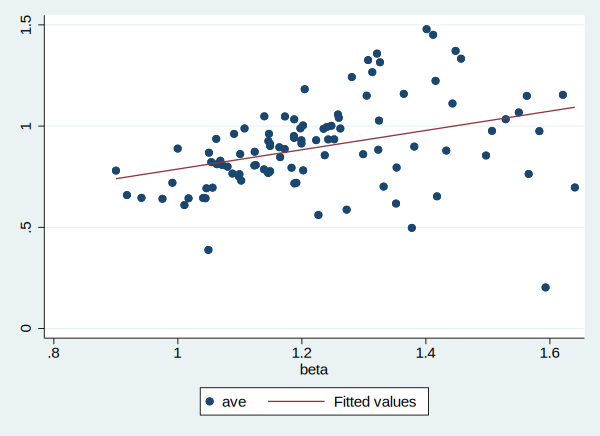

In [17]:
* plot the data and the linear fit of ave on beta
scatter ave beta || lfit ave beta

# Task 4: Redo the two-pass prosedure for a subset of data

Redo both the first-pass and the second-pass regression but for the period starting in Jan 1990 and ending Dec 2019. 


In [18]:
* Open the full data file we saved at the start
use all_data, clear

In [19]:
* drop the data before Jan 1990 and save as a new file
drop if date < 199000 | date > 201912
save 1990_2019, replace
* ascertain the data looks as expected


(771 observations deleted)

file 1990_2019.dta saved


In [20]:
%browse

,date,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
1,199001,-7.8499999,-6.4050999,-8.6424999,-8.3605003,-7.6665001,-4.4204001,-5.6342001,-5.7305999,-6.4379001,-5.2624002,-6.3116999,-11.6851,-9.5338001,-7.8515,-8.3252001,-5.5012999,-5.7196002,-10.4788,-7.8860002,-7.4973998,-7.6071,-10.513,-8.2339001,-11.8705,-9.4953003,-8.2608004,-8.0937996,-10.9084,-6.6332002,-8.1639004,-7.7386999,-12.6156,-8.1406002,-10.3012,-8.0858002,-7.4331999,-8.2777004,-7.3713999,-9.1162004,-5.7108002,-17.6572,-9.9577999,-11.0641,-8.2040005,-11.73,-8.5641003,-7.7452998,-8.2018003,-10.0068,-9.2988005,-10.4509,-8.8430004,-11.6657,-10.9557,-7.6943002,-6.8207002,-9.0003996,-7.9103999,-5.8174,-6.5310001,-8.6711998,-8.9876003,-5.3944001,-9.5194998,-6.3909001,-6.3497,-5.8319001,-7.1004,-7.1999998,-9.4661999,-7.6764002,-8.1329002,-7.7136002,-5.4765,-5.1257,-10.4182,-9.6796999,-11.5681,-9.8366003,-10.4937,-14.4798,-5.276,-7.4053001,-8.3212004,-9.1889,-6.2449999,-7.8455,-8.6730003,-7.9260001,-7.6061001,-7.8197999,-8.625,-8.6864004,-7.8346,-2.9182,-6.8894,-9.0907001,-7.2821002,-8.1505003,-5.3813,-5.9078999
2,199002,1.11,-.37439999,.56129998,-.185,1.6371,-.36919999,1.2598,1.3044,3.4711001,1.3974,.024499999,3.9043,2.2823,4.6482,-1.0271,.81910002,.041299999,5.1862998,2.1951001,2.4568999,.5248,4.4466,5.4313998,1.3904001,3.9617,4.9305,1.6476001,4.7589002,2.1191001,4.6609998,2.2646999,-.43020001,2.9763,3.4491999,3.03,.28420001,3.4073999,2.0330999,3.1533,1.6704,-1.0143,2.3001001,4.6819,2.1737001,4.2333999,1.3896,.9375,.056899998,.44670001,.45640001,3.4273,1.8903,2.8483,2.9333,1.4461,2.724,.61150002,2.2927999,-.39179999,2.9579,1.4206001,1.8214999,-.87559998,2.4902999,-.2121,1.048,-.40630001,.405,1.4967,3.7495999,2.8399999,1.6208,1.4053,.68769997,1.1028,.70929998,2.5062001,2.2697001,-1.3387001,1.9678,4.8390999,-1.2862999,5.3961,1.2839,-2.0323,3.7955,1.526,1.7965,2.2916,.30680001,-.1304,-.96179998,-1.1262,-1.0316,4.8249998,1.2105,1.8049001,-1.14,2.7282,3.2198,-.61519998
3,199003,1.83,2.7272,2.1800001,2.2739999,2.7045,1.7812999,1.1919,2.2056,4.3357,1.88,.51249999,5.4313002,4.9837999,2.641,-.13779999,1.1932,3.4435,3.5948,2.3783,2.7546999,-2.0443001,5.8151999,3.1528001,4.3841,5.3498001,7.8635001,5.5742002,2.1930001,3.0439,3.5780001,-.80250001,3.6801,3.642,4.4224,1.003,2.0481,1.6978,2.9704001,1.6709,-.43560001,1.9531,5.3464999,2.8134999,2.5044,2.7439001,7.704,5.5058999,1.1815,4.1398001,2.3134,-.41780001,6.3643999,3.5651,2.0465,1.5553,1.5457,-1.5286,.15809999,-.65030003,-1.8178999,-3.1043,4.7529001,4.5271001,4.9169002,3.5803001,2.398,1.5268,.50470001,2.0987,-.1313,1.4461,2.9114001,1.6481,4.1455002,.30700001,1.6733,-.62760001,1.5947,1.3995,-1.1113,-4.6747999,2.4037001,3.0079999,3.4960001,4.7642002,-.77039999,-.198,-.079000004,-2.3218,-.98500001,-2.408,3.9265001,2.5973001,3.7114,2.3587999,-1.7871,1.031,.66390002,.059099998,2.4919,-.97430003
4,199004,-3.3599999,-1.6381,-2.9865,-4.5103002,-.85100001,-2.6837001,-2.1814001,-.86879998,-3.0002,-2.9379001,-4.5911999,-5.7747002,-2.3706,-1.0846,-6.5524998,-.163,-5.5008001,-5.3674002,-3.7797999,-2.0144,-7.4106002,-2.1436,-2.9489999,-2.2177,-3.0764,-1.2668999,-.9921,-4.5823002,-3.3612001,-4.5918999,-6.4040999,-7.9668999,-5.2795,-4.7670999,-6.7477999,-3.0193999,-5.5785999,-3.1775,-3.3188,-6.7694001,-7.5274,-3.2886,-3.9077001,-1.8214,-4.5681,-3.8355,-5.2834001,-4.8340998,

In [21]:
* add 3 more empty observations
local new_obs = _N + 3
set obs `new_obs'
* ascertain the end of the data looks as expected



number of observations (_N) was 360, now 363


In [22]:
%tail

,date,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
354,201906,6.9299998,5.7944999,3.0855999,1.3374,6.2926998,8.1289997,3.5541,5.7367001,5.1567001,3.5650001,4.6048999,9.2875004,9.8633003,8.5930004,4.9647002,2.5408001,5.4008002,8.9059,5.9309001,4.8842001,5.2522998,12.8193,8.7409,9.4350004,6.7009001,7.2414999,6.4109001,6.8866,5.5486002,8.7215996,7.1247001,6.0675998,7.8695002,8.0889997,10.2518,11.798,9.1885996,6.3965998,7.6784,6.5809002,2.3536,5.4719,8.2525997,9.059,5.8182001,8.5305004,9.0707998,8.5906,6.0202999,6.4240999,7.3009,12.8604,9.5232,9.3936005,7.3842001,6.1691999,7.5095,4.0755,7.7051001,7.6071,2.424,6.3529,9.5844002,8.8340998,9.5382996,12.1733,9.3366003,5.2660999,10.6212,6.3002,5.8532,5.7403002,6.7171998,9.4097996,9.7497997,12.2723,5.6299,6.2131,5.8979998,3.9282,10.3873,5.8705001,8.5965004,8.2774,7.6964998,7.5641999,6.4821,5.2165999,8.4352999,4.3101001,8.7704,6.5440998,9.2749996,3.0808001,8.0927,5.5525999,5.2877002,5.4829998,6.9466,9.0495005,6.6127
355,201907,1.1900001,-4.1345,1.133,-5.6581001,-4.7220998,-8.3448,-4.2937999,-3.3727,-1.3494999,-1.9719,-3.7772999,-2.1789,-5.8235998,2.2637,-2.7753999,.13259999,.80290002,-2.3341,-1.3108,-.1241,-6.1202002,-3.4777999,-5.9187002,-3.6191001,2.5474,-1.6587,3.2346001,2.2254,-1.2671,1.9601001,-1.1199,-2.1434,-2.3782001,-.0561,2.9921999,.94940001,.4093,.2156,1.4246,2.4439001,-10.4167,4.5044999,-2.2393999,1.1318001,.9551,.48280001,.74919999,-1.1918,-.00039999999,-3.3006001,1.4426,5.8481002,2.8074,-.55989999,4.0732002,-.25870001,.85570002,-1.2508,.95569998,3.6629,1.5763,3.0492001,.76779997,1.189,-.66039997,3.2785001,.91970003,2.2342999,.6038,-2.2663,.84369999,1.1553,1.5444,.85699999,.5499,1.5152,.72259998,-.88450003,-.79119998,-.0038999999,1.0501,2.0576999,.59109998,2.131,-.7802,2.098,-1.3331,.31009999,1.3271,2.7151999,.1789,.79900002,2.3968,2.2247,1.5516,1.0112,3.6551001,-.75489998,3.9935999,3.937,1.8261
356,201908,-2.5799999,-2.5346999,-7.4814,-5.2066002,-7.5267,-7.4043002,-6.8408999,-7.5317001,-5.1356001,-4.2758002,-8.79,-1.6572,-8.0754995,-5.0469999,-6.6981001,-8.8629999,-7.3267002,-4.777,-8.6761999,-9.8716002,-11.844,-3.6001999,-8.9018002,-6.3371,-6.381,-5.2914,-4.7887998,-4.4137001,-5.7150002,-9.8915997,-11.555,4.1988001,.37200001,-10.1684,-5.9562001,-3.3018999,-5.7474999,-6.7824001,-7.1753001,-6.6694999,-17.656099,-3.9065001,-5.4892998,-5.1485,-5.4305,-9.4531002,-5.1606998,-8.2075996,-5.7733998,-8.8221998,-19.9561,-5.7164001,-6.3683,-3.5352001,-2.8002999,-1.0261,-5.7540998,-10.4049,-5.7999001,-10.693,-10.4271,.83939999,-4.1992002,-6.4194999,-6.0700998,-3.7972,-9.4462004,-7.3534999,-4.7347002,-8.4706001,-6.0667,-2.9466,-2.7895,-3.4026999,-4.0349002,-5.5286999,-3.8578999,-1.8612,-11.9992,-8.3687,-9.3753004,-4.5846,.2696,-2.6198001,-3.9064,-2.9475999,-1.8005,-3.6761,-5.3906002,-5.1729999,-7.3849001,1.0548,-1.9334,-2.7203,-1.2302999,-4.6893001,-2.1283,-3.1482999,-3.0659001,-8.9350004,-9.8143997
357,201909,1.4299999,-1.6260999,-.26069999,.63810003,.2411,-1.4553,-.3145,3.608,2.9530001,5.9500999,6.6300998,-2.97,-6.5847998,-1.3053,.2053,7.3994002,2.8561001,5.2589998,7.1069002,8.8364,6.5738001,-5.4393001,1.8749,-1.141,3.3998001,.2687,6.3231001,5.4542999,4.3862,3.9549,4.6680999,-3.0569999,-1.3135,-.66799998,4.6613002,3.3808,4.4871998,5.7241998,5.7275,3.7895,2.5164001,-7.0074,-2.3222001,-2.4526,3.4387,3.3601,2.905100

In [23]:
* save all variable names of the portfolios without ex_mkt in a local macro
unab ports: smalllobm - bighibm
* set up the loop for the first-pass regressions and add the outputs in the bottom 3 rows you just inserted
foreach v of local ports {
    qui reg `v' ex_mkt
    qui replace `v' = _b[_cons] in -3
    qui replace `v' = _b[ex_mkt] in -2
    qui replace `v' = e(rmse) in -1
}

In [24]:
* add one more row
local new_obs = _N + 1
set obs `new_obs'
* save all variables including ex_mkt in a local macro named vars
unab vars: ex_mkt - bighibm
* set up the loop to compute the mean of each var and save it in the bottom row
foreach v of local vars {
    qui sum `v' in 1/-5, meanonly
    qui replace `v' = r(mean) in -1
}
* ascertain the end of the data looks as expected



number of observations (_N) was 363, now 364




In [25]:
%tail

,date,ex_mkt,smalllobm,me1bm2,me1bm3,me1bm4,me1bm5,me1bm6,me1bm7,me1bm8,me1bm9,smallhibm,me2bm1,me2bm2,me2bm3,me2bm4,me2bm5,me2bm6,me2bm7,me2bm8,me2bm9,me2bm10,me3bm1,me3bm2,me3bm3,me3bm4,me3bm5,me3bm6,me3bm7,me3bm8,me3bm9,me3bm10,me4bm1,me4bm2,me4bm3,me4bm4,me4bm5,me4bm6,me4bm7,me4bm8,me4bm9,me4bm10,me5bm1,me5bm2,me5bm3,me5bm4,me5bm5,me5bm6,me5bm7,me5bm8,me5bm9,me5bm10,me6bm1,me6bm2,me6bm3,me6bm4,me6bm5,me6bm6,me6bm7,me6bm8,me6bm9,me6bm10,me7bm1,me7bm2,me7bm3,me7bm4,me7bm5,me7bm6,me7bm7,me7bm8,me7bm9,me7bm10,me8bm1,me8bm2,me8bm3,me8bm4,me8bm5,me8bm6,me8bm7,me8bm8,me8bm9,me8bm10,me9bm1,me9bm2,me9bm3,me9bm4,me9bm5,me9bm6,me9bm7,me9bm8,me9bm9,me9bm10,biglobm,me10bm2,me10bm3,me10bm4,me10bm5,me10bm6,me10bm7,me10bm8,me10bm9,bighibm
355,201907,1.1900001,-4.1345,1.133,-5.6581001,-4.7220998,-8.3448,-4.2937999,-3.3727,-1.3494999,-1.9719,-3.7772999,-2.1789,-5.8235998,2.2637,-2.7753999,.13259999,.80290002,-2.3341,-1.3108,-.1241,-6.1202002,-3.4777999,-5.9187002,-3.6191001,2.5474,-1.6587,3.2346001,2.2254,-1.2671,1.9601001,-1.1199,-2.1434,-2.3782001,-.0561,2.9921999,.94940001,.4093,.2156,1.4246,2.4439001,-10.4167,4.5044999,-2.2393999,1.1318001,.9551,.48280001,.74919999,-1.1918,-.00039999999,-3.3006001,1.4426,5.8481002,2.8074,-.55989999,4.0732002,-.25870001,.85570002,-1.2508,.95569998,3.6629,1.5763,3.0492001,.76779997,1.189,-.66039997,3.2785001,.91970003,2.2342999,.6038,-2.2663,.84369999,1.1553,1.5444,.85699999,.5499,1.5152,.72259998,-.88450003,-.79119998,-.0038999999,1.0501,2.0576999,.59109998,2.131,-.7802,2.098,-1.3331,.31009999,1.3271,2.7151999,.1789,.79900002,2.3968,2.2247,1.5516,1.0112,3.6551001,-.75489998,3.9935999,3.937,1.8261
356,201908,-2.5799999,-2.5346999,-7.4814,-5.2066002,-7.5267,-7.4043002,-6.8408999,-7.5317001,-5.1356001,-4.2758002,-8.79,-1.6572,-8.0754995,-5.0469999,-6.6981001,-8.8629999,-7.3267002,-4.777,-8.6761999,-9.8716002,-11.844,-3.6001999,-8.9018002,-6.3371,-6.381,-5.2914,-4.7887998,-4.4137001,-5.7150002,-9.8915997,-11.555,4.1988001,.37200001,-10.1684,-5.9562001,-3.3018999,-5.7474999,-6.7824001,-7.1753001,-6.6694999,-17.656099,-3.9065001,-5.4892998,-5.1485,-5.4305,-9.4531002,-5.1606998,-8.2075996,-5.7733998,-8.8221998,-19.9561,-5.7164001,-6.3683,-3.5352001,-2.8002999,-1.0261,-5.7540998,-10.4049,-5.7999001,-10.693,-10.4271,.83939999,-4.1992002,-6.4194999,-6.0700998,-3.7972,-9.4462004,-7.3534999,-4.7347002,-8.4706001,-6.0667,-2.9466,-2.7895,-3.4026999,-4.0349002,-5.5286999,-3.8578999,-1.8612,-11.9992,-8.3687,-9.3753004,-4.5846,.2696,-2.6198001,-3.9064,-2.9475999,-1.8005,-3.6761,-5.3906002,-5.1729999,-7.3849001,1.0548,-1.9334,-2.7203,-1.2302999,-4.6893001,-2.1283,-3.1482999,-3.0659001,-8.9350004,-9.8143997
357,201909,1.4299999,-1.6260999,-.26069999,.63810003,.2411,-1.4553,-.3145,3.608,2.9530001,5.9500999,6.6300998,-2.97,-6.5847998,-1.3053,.2053,7.3994002,2.8561001,5.2589998,7.1069002,8.8364,6.5738001,-5.4393001,1.8749,-1.141,3.3998001,.2687,6.3231001,5.4542999,4.3862,3.9549,4.6680999,-3.0569999,-1.3135,-.66799998,4.6613002,3.3808,4.4871998,5.7241998,5.7275,3.7895,2.5164001,-7.0074,-2.3222001,-2.4526,3.4387,3.3601,2.9051001,4.0253,6.2354999,5.2399001,5.7097998,-3.8999,-1.1384,1.8171,1.4845001,2.8052001,3.3782001,9.5560999,5.6086001,7.3446002,6.0756998,-5.3846998,.019400001,1.1086,2.2511001,4.0558,7.8537002,6.1775999,7.0612998,4.4200001,4.0155001,-6.6402998,-.2307,3.5667,5.2417998,4.4928002,4.7024002,5.1065001,3.8048,5.2076998,5.1364999,-.69330001,-.45159999,1.5231,3.5699,1.8329,3.4391,3.8243999,4.4821,3.4837999,-2.0643001,-.94239998,2.4022,.49860001,3.1473999,2.9238999,2.4849,4.0953999,6.5661001,4.6492,7.4717002
358,201910,2.0599999,2.1954999,-3.6616001,-2.1605,-5.4341998,-.88300002,-2.1375,-.2669,-1.7798001,.36860001,-3.2520001,-1.6676,3.9612999,4.2080998,-.67220002,-.78240001,3.5878,2.8943999,1.3688999,3.392,-6.3242998,-.30779999,1.2523,3.9015999,2.9977,1.556,1.1964999,4.4095998,.72409999,-.2588,2.4468999,5.2445002,4.6574998,9.3528004,2.1112001,.92140001,2.0562999,1.9776,1.6884,4.0309,-2.7063,9.0688,5.1522002,1.7743,4.62

In [26]:
* drop date and keep only the last 4 rows
drop date
keep in -4/l
* transpose the rows into columns
xpose, clear
* rename v1-v4 accordingly
rename v1 alpha
rename v2 beta
rename v3 rmse
rename v4 ave



(360 observations deleted)







In [27]:
%browse

,alpha,beta,rmse,ave
1,.,.,.,.66927779
2,-.92351115,1.3084167,6.1966548,-.04781694
3,-.61020494,1.2815131,5.6150842,.24748334
4,-.047098622,1.2353345,5.9797382,.77968335
5,-.12887521,1.1557292,4.5719891,.64462864
6,-.041443836,1.1011537,4.1826062,.69553387
7,.25863644,.95928109,3.6802547,.90066195
8,.39423597,.92355877,4.5020843,1.0123533
9,.2979503,.89028138,3.482435,.89379585
10,.51283318,.88964951,3.6066594,1.1082559


In [28]:
* save the average mkt excess return in a local macro
local ave_mkt = ave in 1
* drop the first row
drop in 1
* generate a variable = to bera squared
gen beta_sq = beta*beta
* run the second pass regression
reg ave beta beta_sq rmse
* display the saved average MRP and practice interpreting the results
di "`ave_mkt'"




(1 observation deleted)



      Source |       SS           df       MS      Number of obs   =       100
-------------+----------------------------------   F(3, 96)        =      8.86
       Model |  .909667554         3  .303222518   Prob > F        =    0.0000
    Residual |  3.28658679        96  .034235279   R-squared       =    0.2168
-------------+----------------------------------   Adj R-squared   =    0.1923
       Total |  4.19625435        99  .042386408   Root MSE        =    .18503

------------------------------------------------------------------------------
         ave |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        beta |   3.944058   1.398582     2.82   0.006     1.167894    6.720222
     beta_sq |  -1.931605   .6176204    -3.13   0.002    -3.157572   -.7056387
        rmse |  -.0128053   .0231315    -0.55   0.581    -.0587209    .0331102
       _cons |  -1.11

In [29]:
* now save this second regression output in a matrix named recent_hist
matrix recent_hist = r(table)

In [30]:
* finally display the two matrices with the regression results and interpret them
matlist full_hist 
matlist recent_hist



             |      beta    beta_sq       rmse      _cons 
-------------+--------------------------------------------
           b |  5.785098  -2.030032  -.0134518  -3.022976 
          se |  1.524374   .5917027   .0187615   .9643192 
           t |  3.795066  -3.430831  -.7169857  -3.134829 
      pvalue |  .0002584   .0008888   .4751238   .0022817 
          ll |  2.759241  -3.204552  -.0506931  -4.937134 
          ul |  8.810956  -.8555113   .0237896  -1.108817 
          df |        96         96         96         96 
        crit |  1.984984   1.984984   1.984984   1.984984 
       eform |         0          0          0          0 


             |      beta    beta_sq       rmse      _cons 
-------------+--------------------------------------------
           b |  3.944058  -1.931605  -.0128053  -1.118325 
          se |  1.398582   .6176204   .0231315   .7828801 
           t |   2.82004  -3.127496  -.5535894  -1.428475 
      pvalue |  .0058338    .002334    .581147   .15